# Time Stepping for Van der Pol equation

The forced equation is given by:
$$\ddot{x} - \mu(1-x^2)\dot{x} + x = F cos(\omega t)$$


In [13]:
# importing libraries
using Plots
using DifferentialEquations
using FFTW
using Statistics

Converting second order ODE to two first order ODEs

$$y_1 = x$$
$$y_2 = \dot{x}$$

making the equations:

$$\dot{y_1} = y_2$$
$$ \dot{y_2} = \mu(1-{y_1}^2)y_2 - y_1 + Fcos(\omega t)$$

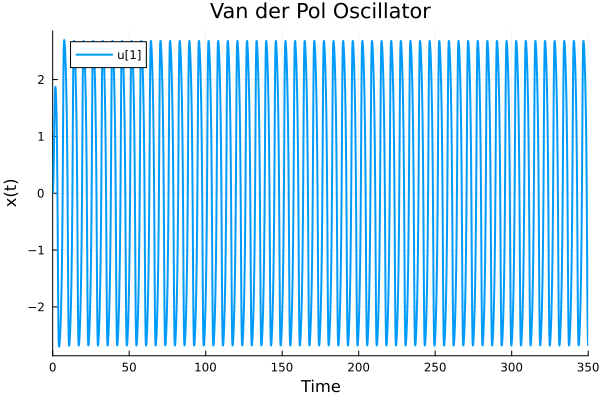

In [17]:
# define the equations

function vanderpol(du, u, p, t)
    μ, ω, F = p
    du[1] = u[2]
    du[2] = μ * (1 - u[1]^2) * u[2] - u[1] + F* cos(ω*t)
end

μ = 0.8
ω = 1
F = 2

param = [μ, ω, F]

# define intial conditions
u0 = [0.0, 0.0]

# time span
tspan = (0.0, 350.0)
dt = 0.001

# solve the ODE
prob= ODEProblem(vanderpol, u0, tspan, param)
sol = solve(prob, ImplicitEuler(), dt=dt)

# plot the solution of x coordinate
plot(sol, vars=(0, 1), linewidth=2, title="Van der Pol Oscillator", xaxis="Time", yaxis="x(t)")

FFT of the solution

Dominant harmonic: 1.0053096491487339
Amplitude at dominant frequency: 2.778225658398521


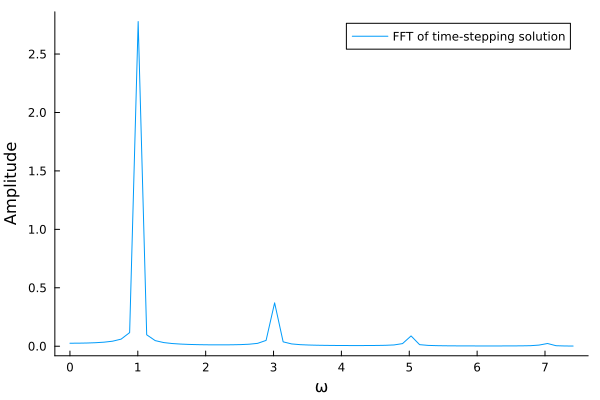

In [18]:
Nsamples = 2000
Tstart = 300
Tend = 350
dt = (Tend - Tstart) / (Nsamples)
tsampled = Vector(Tstart:dt:Tend)
usampled = [sol(t)[1] for t in tsampled]

# performing fft
fsampled = fft(usampled)
# fsampled = fsampled / Nsamples


# frequency
f_max = 1 / (2 * dt)
fstep = 1/((Tend - Tstart))
fvec = Vector(0:fstep:f_max)

# determining the dominant frequency
fmax = fvec[argmax(abs.(fsampled[1:length(fvec)]))]
println("Dominant harmonic: ", fmax*2*π)

# find amplitude of the dominant frequency
# Find index of maximum amplitude in FFT data
max_idx = argmax(abs.(fsampled[1:length(fvec)]))

# Calculate amplitude (with correct scaling)
dominant_amplitude = 2.0/Nsamples * abs(fsampled[max_idx])

# println("Dominant frequency: ", fvec[max_idx], " rad/s")
println("Amplitude at dominant frequency: ", dominant_amplitude)


#keep horizonal axis as ω
fvec = [2 * π * f for f in fvec]
# onlt plot the first half of the frequency components
fvec = fvec[1:Int(Nsamples/20)]
fsampled = fsampled[1:Int(Nsamples/20)]

# only plot first 50 harmonics
fvec = fvec[1:60]
fsampled = fsampled[1:60]


# plotting the frequency components
# p1 = plot(fvec, 2.0/Nsamples * abs.(fsampled[1:length(fvec)]), label="FFT of u1", xlabel="ω", ylabel="Amplitude")
p2 = plot(fvec, angle.(fsampled[1:length(fvec)]), label="FFT of u1", xlabel="Frequency", ylabel="Phase")
# plot(p1, p2, layout=(2,1))
# mention value of gamma in the plot
p1 = plot(fvec, 2.0/Nsamples * abs.(fsampled[1:length(fvec)]),
    label="FFT of time-stepping solution",
    xlabel="ω",
    ylabel="Amplitude",
    xticks=0:1:maximum(fvec),  # Set ticks every 1 unit
    # Alternative: for even denser ticks use
    # xticks=0:0.5:maximum(fvec),  # Set ticks every 0.5 units
    grid=false
)


# show the plot
plot(p1)